In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [3]:
x=df.drop(columns=["id","churn"])
y=df["churn"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print("Training set shape",x_train.shape,y_train.shape)
print("Testing set shape",x_test.shape,y_test.shape)

Training set shape (10954, 61) (10954,)
Testing set shape (3652, 61) (3652,)


In [4]:
#Random Foreast 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)

accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("Accuracy:",accuracy_rf)

Accuracy: 0.9088170865279299


Text(20.72222222222222, 0.5, 'True')

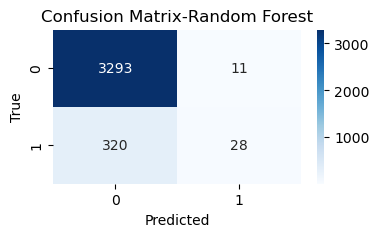

In [6]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(4,2))
sns.heatmap(cm_rf,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix-Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")

In [13]:
#Feature importances
fi_rf=rf.feature_importances_
df_fi_rf=pd.DataFrame({"Feature":x_train.columns,"Importances":fi_rf})
df_fi_rf=df_fi_rf.sort_values(by="Importances",ascending=True)
print("Random Forest Feature Importances")
print(df_fi_rf)

Random Forest Feature Importances
                                     Feature  Importances
4                   forecast_discount_energy     0.000953
46        peak_mid_peak_fix_max_monthly_diff     0.000968
30                 var_6m_price_mid_peak_fix     0.002161
29                     var_6m_price_peak_fix     0.002164
54  channel_ewpakwlliwisiwduibdlfmalxowmwpci     0.002808
..                                       ...          ...
12                        margin_net_pow_ele     0.047802
3                          forecast_cons_12m     0.048682
14                                net_margin     0.051845
5                    forecast_meter_rent_12m     0.052027
0                                   cons_12m     0.053520

[61 rows x 2 columns]


Text(0.5, 0, 'Importance')

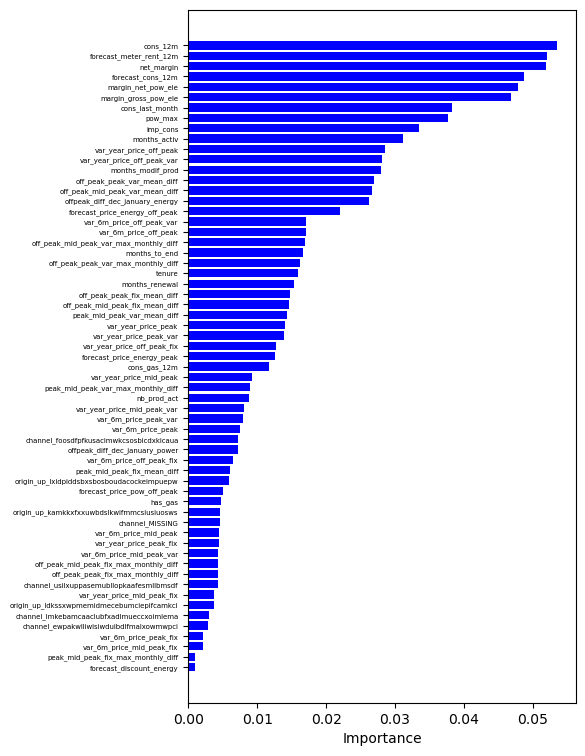

In [24]:
#Visualization RF
plt.figure(figsize=(5,9))
plt.barh(range(len(df_fi_rf["Feature"])),df_fi_rf["Importances"],color="Blue")
plt.yticks(range(len(df_fi_rf["Feature"])),df_fi_rf["Feature"],fontsize=5)
plt.xlabel("Importance")